In [27]:
import pandas as pd
import matplotlib.pyplot as plt

In [7]:
posts_df = pd.read_csv('../food_trends/Data/reddit_6_months.csv')

posts_df.drop(columns=['subreddit','selftext'], inplace=True)
posts_df

### Look at the distribution of scores

In [19]:
posts_df['score'].value_counts()

1       48671
2         847
3          59
0          55
5          31
        ...  
223         1
1691        1
66          1
108         1
193         1
Name: score, Length: 132, dtype: int64

<AxesSubplot:ylabel='Frequency'>

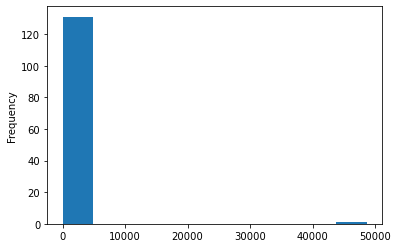

In [14]:
posts_df['score'].value_counts().plot(kind='hist')

<AxesSubplot:>

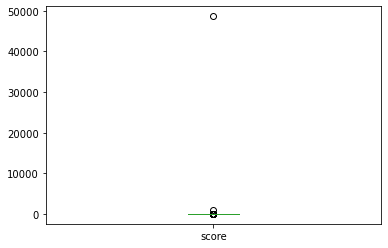

In [15]:
posts_df['score'].value_counts().plot(kind='box')

### Look at the distribution of num_comments

In [20]:
posts_df['num_comments'].value_counts()

0      36831
1       8714
2       1295
3        639
4        516
       ...  
276        1
140        1
76         1
159        1
220        1
Name: num_comments, Length: 144, dtype: int64

<AxesSubplot:ylabel='Frequency'>

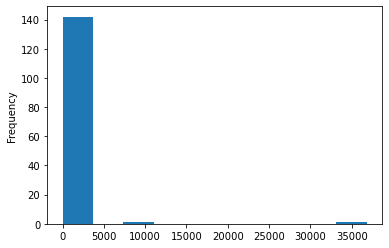

In [16]:
posts_df['num_comments'].value_counts().plot(kind='hist')

<AxesSubplot:>

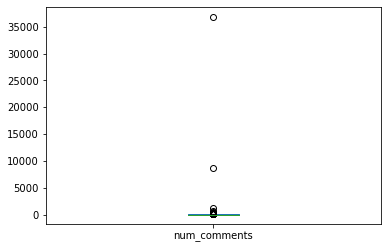

In [18]:
posts_df['num_comments'].value_counts().plot(kind='box')

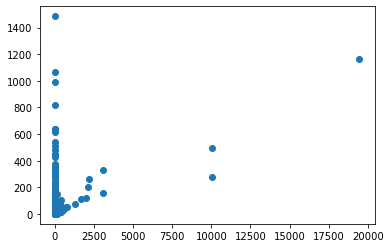

In [29]:
plt.scatter(posts_df['score'], posts_df['num_comments']);

In [31]:
posts_df['score'].corr(posts_df['num_comments'])

0.3915126184490048

#### It is clear that there are some outliers, I will not drop the outliers since they are the poster children of 'viral'

In [21]:
posts_df['score'].mean()

2.554855810431074

In [22]:
posts_df['score'].median()

1.0

In [23]:
posts_df['score'].max()

19456

In [26]:
posts_df.sort_values(by='score', ascending=False).head(10)

,id,title,created_utc,num_comments,score
48869,rbc92q,[homemade] blackberry curd tart,1638918714,1166,19456
48676,rbujoz,[homemade] orange-vanilla madeleines,1638979551,281,10015
49010,razqa7,"[Homemade] Spanish chicken, chorizo and bean stew",1638885375,493,10012
48854,rbd32h,[homemade] Pizza,1638921107,155,3085
49000,rb03po,[homemade] pickled everything,1638886479,332,3083
48667,rbvc4p,[Homemade] Gingerbread Man,1638981797,265,2163
48675,rbulci,[Homemade] Chocolate chip cookie,1638979682,203,2111
48708,rbru02,[homemade] French onion soup,1638971598,123,1973
48729,rbpkmf,[homemade] Jumping on the bandwagon- cranberry...,1638963928,113,1691
49008,razu63,[Homemade] Smoked chicken wings with mango hab...,1638885696,78,1262


In [32]:
posts_df.sort_values(by='score', ascending=True).head(10)

,id,title,created_utc,num_comments,score
39204,rx2bbt,[Homemade] Chicken Gnocchi Soup and Breadsticks,1641431592,0,0
41664,rsdoc4,[Homemade] Chicken coconut curry,1640902196,0,0
14169,trtd45,[i ate] yay or nae Sugar cookies,1648598210,10,0
32814,sc60ua,[homemade] stuffed peppers,1643088060,0,0
14153,tru9vx,[Homemade]Sloppy Kings.. Not Sloppy Joes,1648601151,6,0
28433,sn8ur8,[homemade] Dwarven Flatbread from the Hero’s F...,1644288355,0,0
46869,rgcneg,[Homemade] Sausage chowder,1639503307,0,0
48937,rb5keh,[I ate] tandoori momos,1638901441,2,0
7939,u8do76,[Homemade] Oven-Baked Pretzels &amp; Applewood...,1650510050,1,0
19129,tcq0sc,[Homemade] Bacon,1647116666,0,0


#### Baseline

In [34]:
posts_df['score'].value_counts(normalize=True)

1       0.969986
2       0.016880
3       0.001176
0       0.001096
5       0.000618
          ...   
223     0.000020
1691    0.000020
66      0.000020
108     0.000020
193     0.000020
Name: score, Length: 132, dtype: float64

If picking 1 as the score 100% of the time, the model would have an accuracy score of .9699, any model should perform better than baseline.